In [17]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [18]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [19]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [20]:
from sklearn.feature_selection import SelectKBest # 特徴として良いものの上位Kこ取り出す。
from sklearn.feature_selection import chi2 # 基準となるのがカイ２乗

In [21]:
skb = SelectKBest(chi2, k=20)  # chi2基準で上位20個取り出す、インスタンスを作る。

In [22]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x110c741e0>)

In [23]:
X_train_new = skb.transform(X_train)

In [24]:
X_train_new.shape, X_train.shape

((455, 20), (455, 30))

In [25]:
skb.get_support()# どの特徴量を使ったのかがboolでわかる。

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False], dtype=bool)

In [26]:
data.feature_names[skb.get_support()] # 使った特徴量

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='<U23')

In [27]:
data.feature_names[~skb.get_support()] # 使わなかった特徴量

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'],
      dtype='<U23')

In [28]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [52]:
from sklearn.model_selection import StratifiedKFold

k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:

    ss = StratifiedKFold(n_splits=10, 
                         shuffle=True, 
                         random_state=2)
    score = []
    for train_index, val_index in ss.split(X_train,
                                           y_train):

        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]

        skb = SelectKBest(chi2, k=k)
        skb.fit(X_train2, y_train2) # X_train2, y_train2を使うのに注意!!　
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val    = skb.transform(X_val) # X_train2, y_train2を用いて特徴選択したインスタンスを使うのに注意!!
        
        clf.fit(X_new_train2, y_train2)
        score.append( clf.score(X_new_val, y_val) )

    scores.append( np.array(score).mean() )
    std.append( np.array(score).std() )
    
scores = np.array(scores)
std = np.array(std)

In [53]:
scores

array([ 0.90777778,  0.93198068,  0.9231401 ,  0.91879227,  0.9342029 ,
        0.9384058 ,  0.94280193,  0.94497585,  0.95164251,  0.95830918,
        0.95613527,  0.95613527,  0.95826087,  0.95391304,  0.95391304,
        0.95391304,  0.95391304,  0.95608696,  0.95608696,  0.95391304,
        0.95608696,  0.95608696,  0.95391304,  0.95608696,  0.95608696,
        0.962657  ,  0.962657  ,  0.962657  ,  0.962657  ,  0.962657  ])

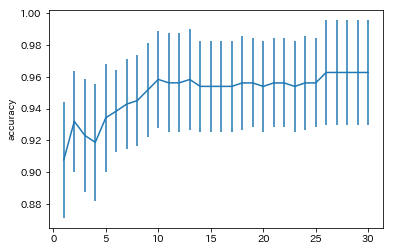

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline 

#plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel("accuracy")

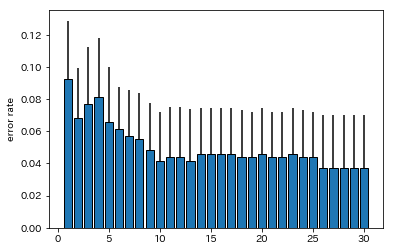

In [55]:
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), std]) # yerr=[a(iterable), b(iterable)] で　下がa, 上がbのエラーバーが出来上がる。
plt.ylabel("error rate")

In [56]:
best_k = k_range[np.argmax(scores)]
print(k_range, type(k_range))
best_k

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30] <class 'numpy.ndarray'>


26

In [57]:
skb = SelectKBest(chi2, k=best_k)

In [58]:
skb.fit(X_train, y_train) # 今度はX_trainとy_trainを使う

SelectKBest(k=26, score_func=<function chi2 at 0x110c741e0>)

In [59]:
X_train_best = skb.transform(X_train)
X_test_best  = skb.transform(X_test)

In [60]:
clf.fit(X_train_best, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
clf.score(X_test_best, y_test)

0.95614035087719296

In [62]:
clf.fit(X_train, y_train);

In [63]:
clf.score(X_test, y_test)

0.95614035087719296

In [30]:
from sklearn.model_selection import StratifiedKFold

In [51]:
ss = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
score = []
for train_index, val_index in ss.split(X_train, y_train):
    print(train_index)
    print()

[  0   1   2   4   5   6   8   9  10  11  12  13  14  17  18  19  20  21
  22  24  25  26  27  28  29  30  32  33  34  35  36  39  40  41  42  43
  44  45  46  48  50  52  53  54  55  56  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 130 133 135 136 137 138 139 140 141 142 143
 144 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 192 193 195 196 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239
 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 256 258 259
 260 261 262 263 265 266 267 268 269 270 271 272 27